<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/2_CNN_Based_Image_Classification_Using_the_CIFAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Overview*

- The CIFAR-10 and CIFAR-100 datasets are commonly used for training machine learning and computer vision algorithms. These datasets contain small, labeled images across different categories such as airplanes, dogs, and cars. Convolutional Neural Networks (CNNs) have proven highly effective for image classification tasks due to their ability to capture spatial hierarchies in images. This project leverages CNNs to classify images from the CIFAR dataset, aiming to achieve high accuracy by optimizing the model architecture and parameters.



# *1. Import Library*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# here error may occur relates with ssl certificatefor solving this problem follow below:
#cd /Applications/Python\ 3.9./Install\ Certificates.command
# here 3.9 indicate your python version(you can control manually by searching)
#then write this code "ls /Applications/Python\ 3.9/Install\ Certificates.command" on bash

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

#

# *2. Visualization*

[4]


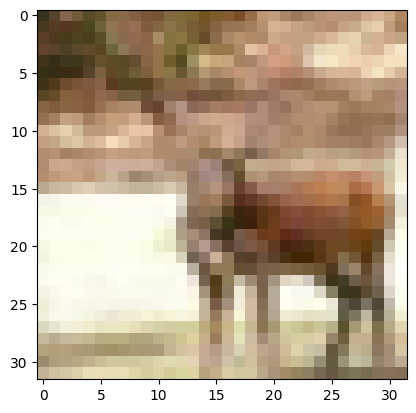

In [ ]:
i=1001
plt.imshow(X_train[i])
print(y_train[i])

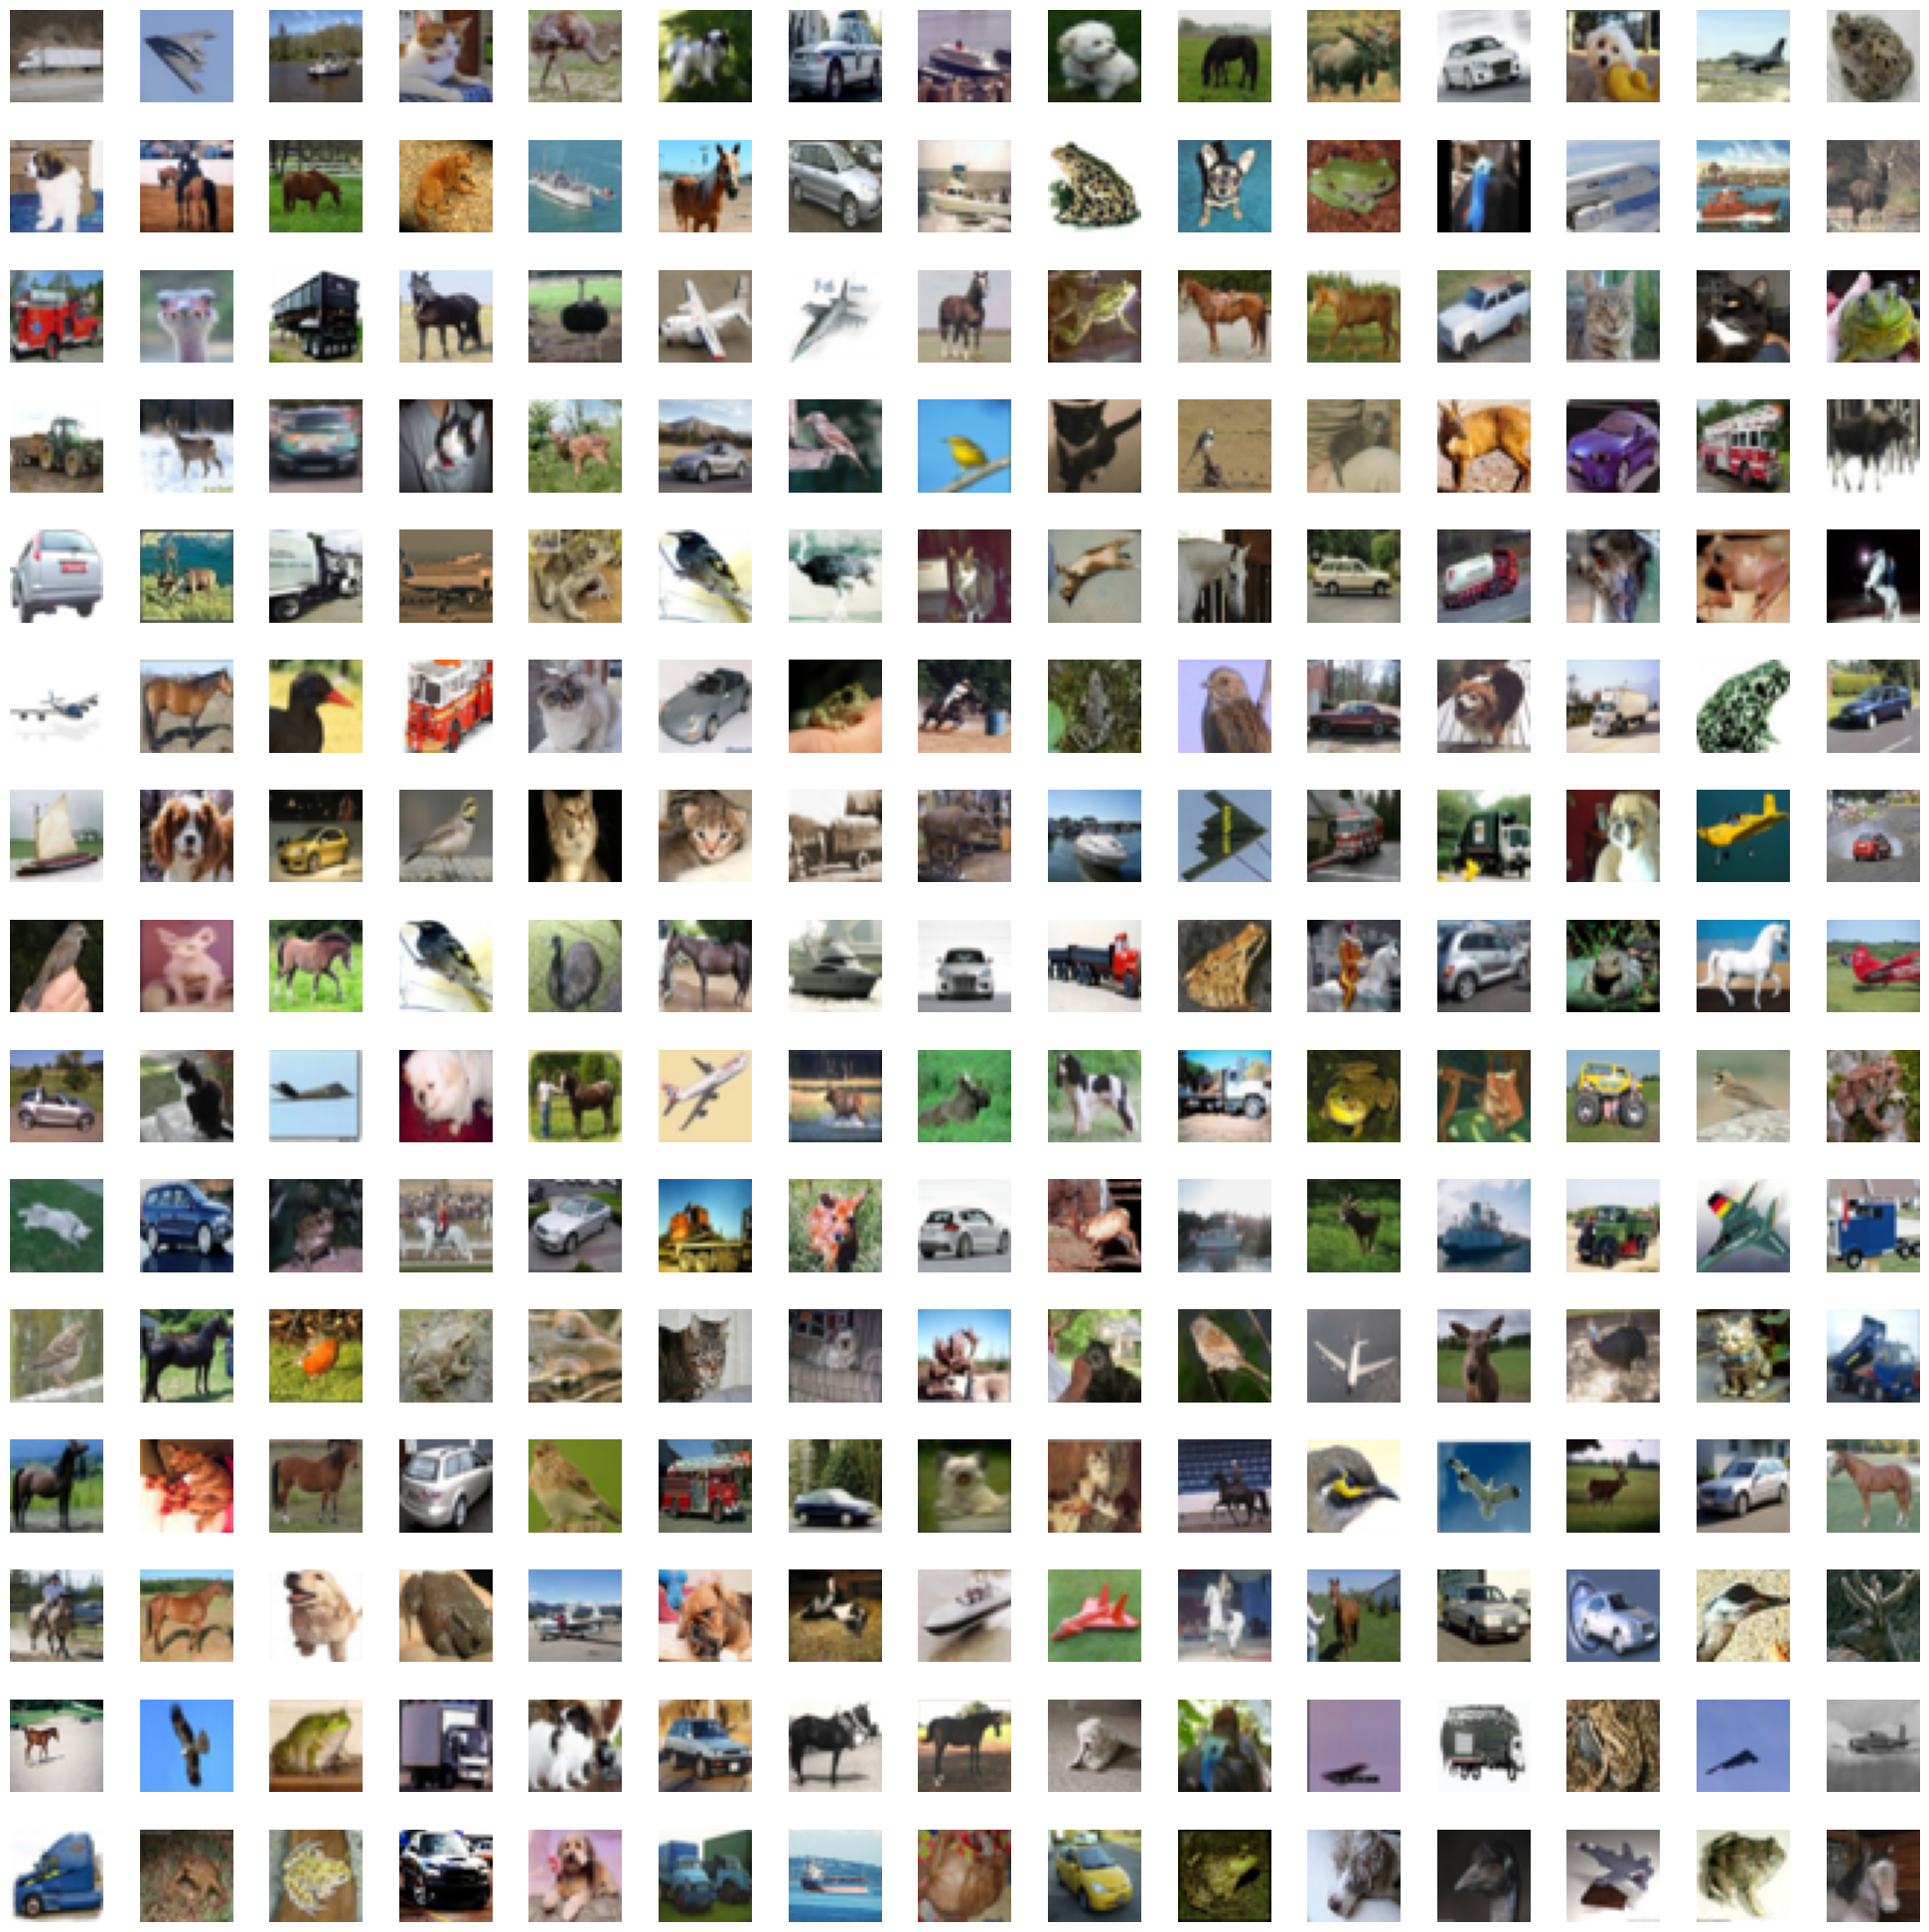

In [ ]:
# visualize much more
W_grid=15
L_grid=15

fig, axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes= axes.ravel()

n_training=len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#

# *3. Data Preparation*

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')


In [ ]:
number_catg=10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train=keras.utils.to_categorical(y_train, number_catg)
y_test=keras.utils.to_categorical(y_test, number_catg)



In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train


array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
input_shape=X_train.shape[1:]

In [ ]:
input_shape

(32, 32, 3)

#


# *4. Model Training*

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax')) #we cant use relu,softmax is best choice

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history=cnn_model.fit(X_train, y_train, batch_size=32, epochs =1 , shuffle=True)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 223s 141ms/step - accuracy: 0.3139 - loss: 1.8702


#

# *5. Model Evaluation*

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5387 - loss: 1.2887
Test Accuracy: 0.5346999764442444


In [ ]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


array([[2.3641741e-02, 2.6374519e-02, 4.8103113e-02, ..., 5.7492112e-03,
        1.7618501e-01, 1.7029770e-02],
       [9.2083767e-02, 4.1849916e-03, 5.7806965e-04, ..., 3.0001885e-07,
        9.0268070e-01, 2.6950683e-04],
       [1.7969242e-01, 1.4973424e-01, 3.5894848e-02, ..., 2.4884765e-03,
        5.2601779e-01, 3.9910607e-02],
       ...,
       [4.9967351e-03, 7.7204005e-04, 1.6832632e-01, ..., 6.8844855e-02,
        1.4601569e-03, 2.8945233e-03],
       [1.8767165e-01, 2.0525733e-01, 1.5393297e-01, ..., 1.7236777e-02,
        2.6116690e-02, 4.0231489e-02],
       [1.1788254e-03, 1.8180138e-04, 9.7943926e-03, ..., 8.9437878e-01,
        2.9089966e-05, 3.8010694e-04]], dtype=float32)

In [ ]:
predicted_categories = np.argmax(predicted_classes, axis=-1)
predicted_categories

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:

y_test=y_test.astype('int64')


In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

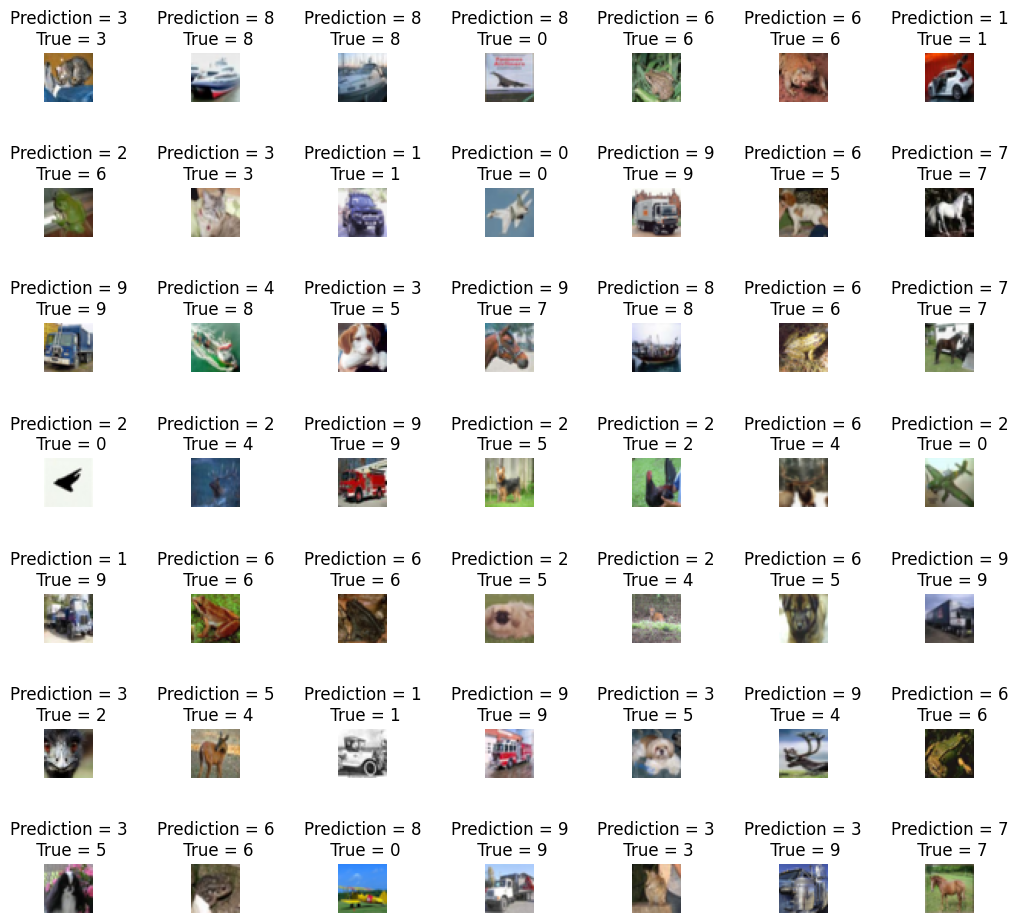

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_categories[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 2)

<Axes: >

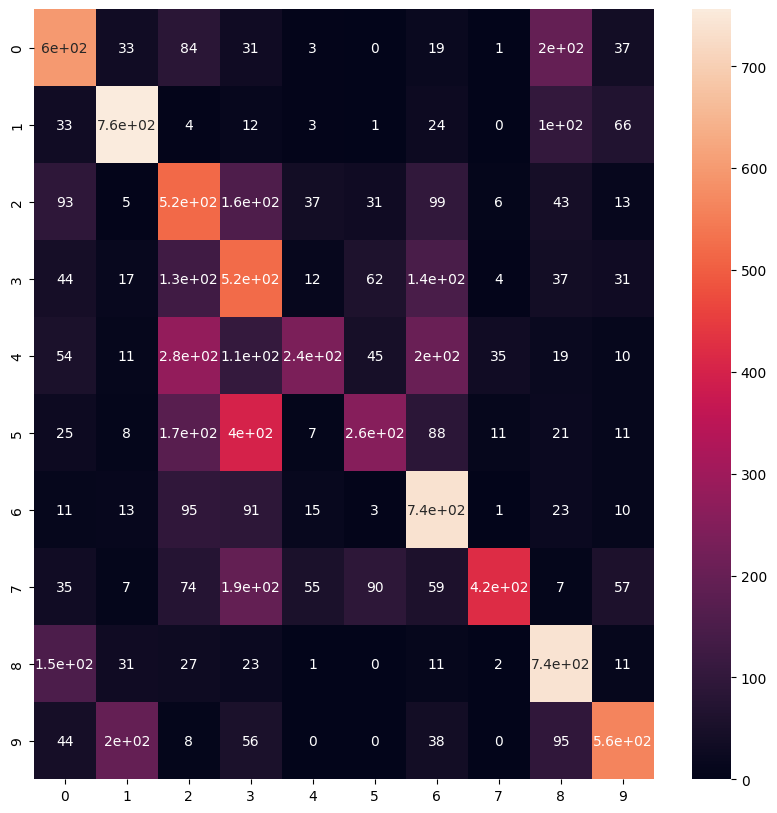

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_categories)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

#

# *6. SAVING THE MODEL*

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

#

# *6. IMPROVING THE MODEL WITH DATA AUGMENTATION*

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
n = 8
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

(8, 32, 32, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

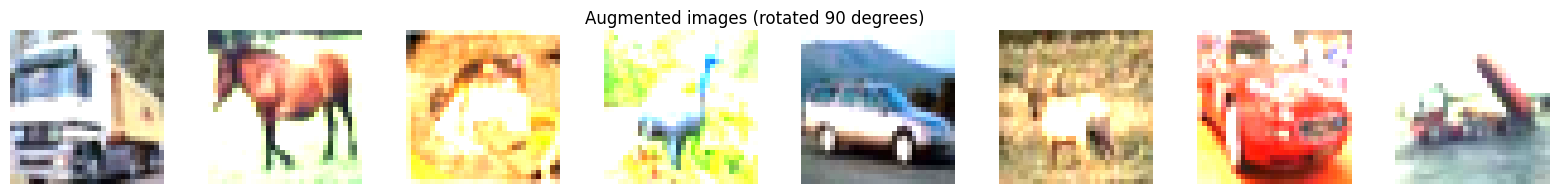

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure to display images
fig = plt.figure(figsize=(20, 2))

# Iterate over a single batch of augmented images
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(np.clip(x_batch[i], 0, 255).astype(np.uint8))  # Ensure image is in the correct format
        ax.axis('off')  # Hide axes

    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break


#

# *7 MODEL TRAINING USING AUGEMENTED DATASET*

In [ ]:
# important: For using this model, we need to missed 6 section ,and run all above until 6 section then model will work perfect

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 227s 145ms/step - accuracy: 0.3500 - loss: 1.7966
Epoch 2/2
1491/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.4283 - loss: 1.5957

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)